Prepare rules for the given data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 


In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
book=pd.read_csv("D:\\DATA SCIENCE\\DATA SCIENCE ASSIGNMENTS\\Assignments\\Association Rule\\book.csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [6]:
book.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Apriori algorithm

In [7]:
frequent_patterns=apriori(book,min_support=0.001,use_colnames=True)
frequent_patterns

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
2042,0.0015,"(RefBks, ArtBks, Florence, ChildBks, GeogBks, ..."
2043,0.0010,"(RefBks, ArtBks, Florence, ChildBks, GeogBks, ..."
2044,0.0010,"(RefBks, ArtBks, Florence, ChildBks, GeogBks, ..."
2045,0.0010,"(RefBks, ArtBks, Florence, GeogBks, ItalArt, Y..."


In [8]:
rules_lift=association_rules(frequent_patterns,metric='lift',min_threshold=0.7)
rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
173047,(YouthBks),"(RefBks, ArtBks, Florence, ChildBks, GeogBks, ...",0.2475,0.0010,0.001,0.004040,4.040404,0.000753,1.003053
173048,(ItalCook),"(RefBks, ArtBks, Florence, ChildBks, GeogBks, ...",0.1135,0.0010,0.001,0.008811,8.810573,0.000887,1.007880
173049,(ItalAtlas),"(RefBks, ArtBks, Florence, ChildBks, GeogBks, ...",0.0370,0.0010,0.001,0.027027,27.027027,0.000963,1.026750
173050,(DoItYBks),"(RefBks, ArtBks, Florence, ChildBks, GeogBks, ...",0.2820,0.0015,0.001,0.003546,2.364066,0.000577,1.002053


In [9]:
rules_lift.sort_values('lift',ascending=False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
171850,"(ArtBks, Florence, ChildBks, ItalCook, ItalAtl...","(RefBks, GeogBks, ItalArt, YouthBks, CookBks)",0.0010,0.0055,0.001,1.000000,181.818182,0.000994,inf
172291,"(ArtBks, Florence, ItalCook, ItalAtlas, DoItYBks)","(RefBks, ChildBks, GeogBks, ItalArt, YouthBks,...",0.0010,0.0055,0.001,1.000000,181.818182,0.000994,inf
170526,"(ArtBks, Florence, ItalCook, ItalAtlas, DoItYBks)","(RefBks, GeogBks, ItalArt, YouthBks, CookBks)",0.0010,0.0055,0.001,1.000000,181.818182,0.000994,inf
171766,"(RefBks, ChildBks, GeogBks, ItalArt, YouthBks,...","(ArtBks, Florence, ItalCook, ItalAtlas, DoItYBks)",0.0055,0.0010,0.001,0.181818,181.818182,0.000994,1.221000
172207,"(RefBks, GeogBks, ItalArt, YouthBks, CookBks)","(ArtBks, Florence, ChildBks, ItalCook, ItalAtl...",0.0055,0.0010,0.001,0.181818,181.818182,0.000994,1.221000
170463,"(RefBks, GeogBks, ItalArt, YouthBks, CookBks)","(ArtBks, Florence, ItalCook, ItalAtlas, DoItYBks)",0.0055,0.0010,0.001,0.181818,181.818182,0.000994,1.221000
170720,"(ArtBks, Florence, ItalCook, ItalAtlas)","(RefBks, GeogBks, ItalArt, YouthBks, DoItYBks,...",0.0020,0.0030,0.001,0.500000,166.666667,0.000994,1.994000
172154,"(RefBks, Florence, ItalArt, ItalCook, DoItYBks)","(ArtBks, ChildBks, GeogBks, YouthBks, ItalAtla...",0.0015,0.0040,0.001,0.666667,166.666667,0.000994,2.988000
172344,"(ArtBks, GeogBks, YouthBks, ItalAtlas, CookBks)","(RefBks, Florence, ChildBks, ItalArt, ItalCook...",0.0040,0.0015,0.001,0.250000,166.666667,0.000994,1.331333
168222,"(RefBks, ChildBks, GeogBks, ItalArt, YouthBks,...","(ArtBks, Florence, ItalCook, ItalAtlas)",0.0030,0.0020,0.001,0.333333,166.666667,0.000994,1.497000


Text(0, 0.5, 'confidence')

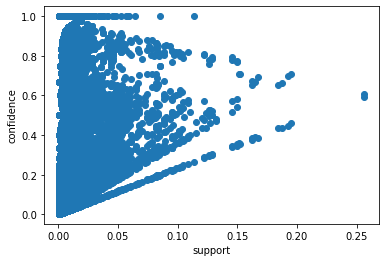

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(rules_lift.support,rules_lift.confidence);plt.xlabel("support");plt.ylabel("confidence")

In [ ]:
rules_confi=association_rules(frequent_patterns,metric='confidence',min_threshold=0.7)
rules_confi

In [ ]:
rules_confi.sort_values('confidence',ascending=False)[0:10]

In [ ]:
plt.scatter(rules_confi.support,rules_confi.confidence);plt.xlabel("support");plt.ylabel("confidence")

In [ ]:
#NOW WE CHANGING min_support VALUE IN APRIORI ALGORITHM
frequent_patterns1=apriori(book,min_support=0.015,use_colnames=True)
frequent_patterns1

In [ ]:
rules_lift1=association_rules(frequent_patterns1,metric='lift',min_threshold=0.7)
rules_lift1

In [ ]:
rules_lift1.sort_values('lift',ascending=False)[0:10]

In [ ]:
rules_lift1.describe()

In [ ]:
plt.scatter(rules_lift1.support,rules_lift1.confidence)

In [ ]:
rules_confi1=association_rules(frequent_patterns1,metric='confidence',min_threshold=0.7)
rules_confi1

In [ ]:
rules_confi1.sort_values('confidence',ascending=False)[0:10]

In [ ]:
plt.scatter(rules_confi1.support,rules_confi1.confidence);plt.xlabel("support");plt.ylabel("confidence")